# Playing with data: Titanic dataset

In [1]:
import sys
import sklearn
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
TITANIC_PATH = os.path.join("Desktop")

In [3]:
def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [4]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Desktop/train.csv'

In [5]:
train_data.head()

NameError: name 'train_data' is not defined

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/Users/fanyangxin/opt/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


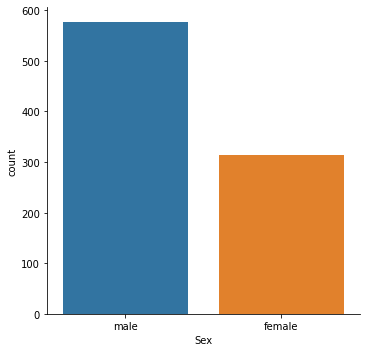

In [8]:
sns.factorplot('Sex',data=train_data,kind='count')

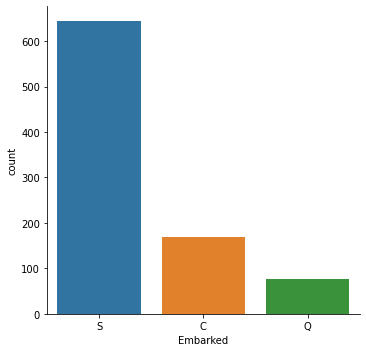

In [9]:
sns.factorplot('Embarked',data=train_data,kind='count')

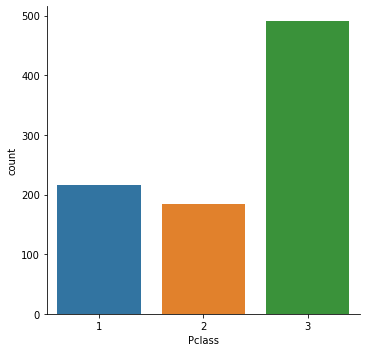

In [10]:
sns.factorplot('Pclass',data=train_data,kind='count')

<AxesSubplot:>

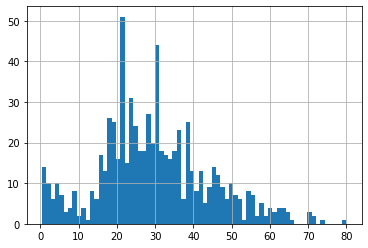

In [11]:
train_data['Age'].hist(bins=70)

<AxesSubplot:>

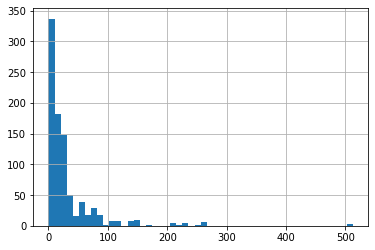

In [12]:
train_data['Fare'].hist(bins=50)

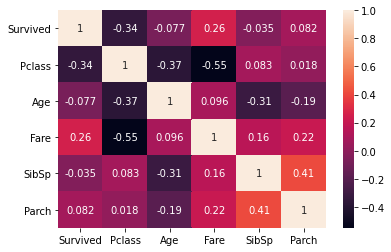

In [13]:
df = pd.DataFrame(train_data,columns=['Survived','Pclass','Age','Fare','SibSp','Parch'])
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [14]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [17]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [18]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


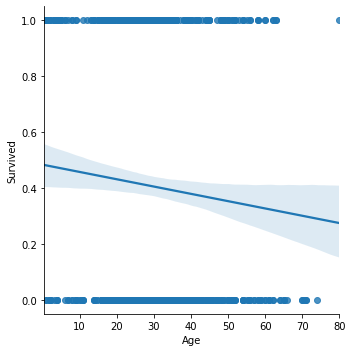

In [19]:
sns.lmplot('Age','Survived',data=train_data)

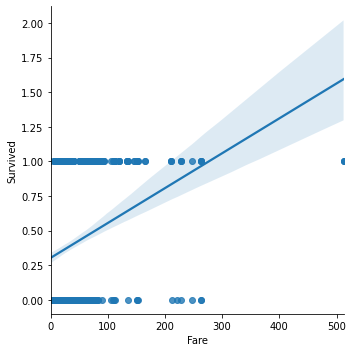

In [20]:
sns.lmplot('Fare','Survived',data=train_data)

/Users/fanyangxin/opt/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/fanyangxin/opt/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/fanyangxin/opt/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


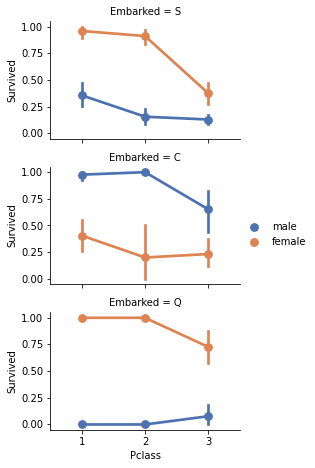

In [21]:
grid = sns.FacetGrid(train_data, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

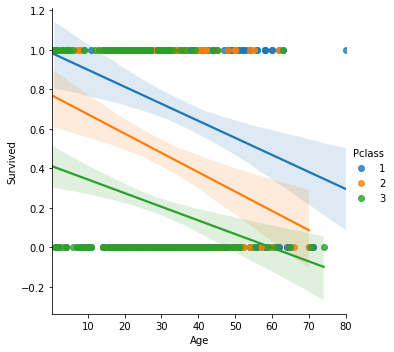

In [22]:
sns.lmplot('Age','Survived',data=train_data,hue='Pclass')

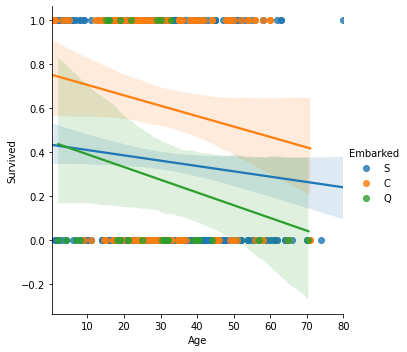

In [23]:
sns.lmplot('Age','Survived',data=train_data,hue='Embarked')

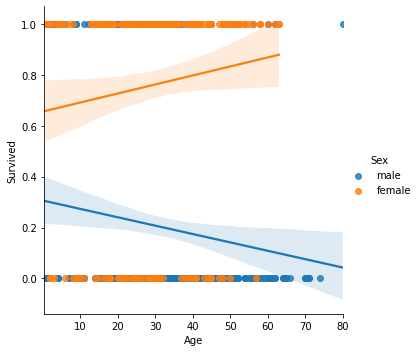

In [24]:
sns.lmplot('Age','Survived',data=train_data,hue='Sex')

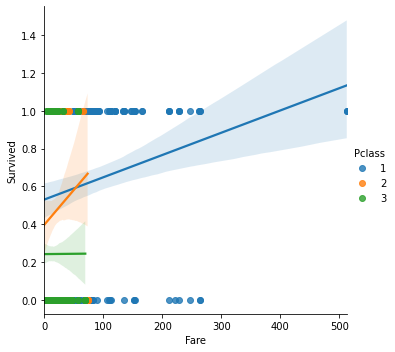

In [25]:
sns.lmplot('Fare','Survived',data=train_data,hue='Pclass')

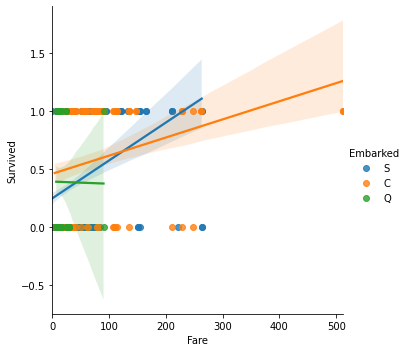

In [26]:
sns.lmplot('Fare','Survived',data=train_data,hue='Embarked')

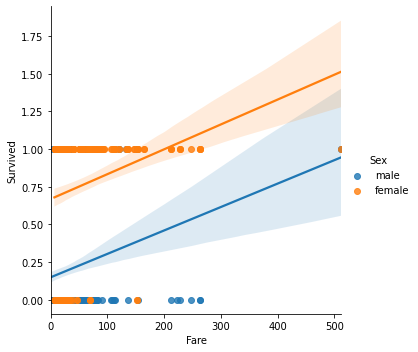

In [27]:
sns.lmplot('Fare','Survived',data=train_data,hue='Sex')

# Bonous points: Using decision tree to predict survival of passengers

Filling missing values in Age and Embarked and drop the Cabin (too many missings)

In [28]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
train_data['Embarked'] = train_data['Embarked'].fillna('S')

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [30]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"]))])

num_pipeline.fit_transform(train_data)

,Age,SibSp,Parch,Fare
0,22.000000,1,0,7.2500
1,38.000000,1,0,71.2833
2,26.000000,0,0,7.9250
3,35.000000,1,0,53.1000
4,35.000000,0,0,8.0500
...,...,...,...,...
886,27.000000,0,0,13.0000
887,19.000000,0,0,30.0000
888,29.699118,1,2,23.4500
889,26.000000,0,0,30.0000


In [31]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [32]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [33]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[22.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [38.        ,  1.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [26.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [29.69911765,  1.        ,  2.        , ...,  0.        ,
         0.        ,  1.        ],
       [26.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [32.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [34]:
y_train = train_data["Survived"]

In [35]:
from sklearn.tree import DecisionTreeClassifier

X = X_train
y = train_data[['Survived']]

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [36]:
X_train[1]

array([38.    ,  1.    ,  0.    , 71.2833,  1.    ,  0.    ,  0.    ,
        1.    ,  0.    ,  1.    ,  0.    ,  0.    ])

In [37]:
from sklearn import tree
text_representation = tree.export_text(tree_clf)
print(text_representation)

|--- feature_7 <= 0.50
|   |--- feature_0 <= 6.50
|   |   |--- feature_1 <= 2.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  2.50
|   |   |   |--- class: 0
|   |--- feature_0 >  6.50
|   |   |--- feature_4 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  0.50
|   |   |   |--- class: 0
|--- feature_7 >  0.50
|   |--- feature_6 <= 0.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  2.50
|   |   |   |--- class: 1
|   |--- feature_6 >  0.50
|   |   |--- feature_3 <= 23.35
|   |   |   |--- class: 1
|   |   |--- feature_3 >  23.35
|   |   |   |--- class: 0



[Text(697.5, 951.3000000000001, 'X[7] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(348.75, 679.5, 'X[0] <= 6.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(174.375, 407.70000000000005, 'X[1] <= 2.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(87.1875, 135.89999999999998, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(261.5625, 135.89999999999998, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(523.125, 407.70000000000005, 'X[4] <= 0.5\ngini = 0.28\nsamples = 553\nvalue = [460, 93]'),
 Text(435.9375, 135.89999999999998, 'gini = 0.204\nsamples = 433\nvalue = [383, 50]'),
 Text(610.3125, 135.89999999999998, 'gini = 0.46\nsamples = 120\nvalue = [77, 43]'),
 Text(1046.25, 679.5, 'X[6] <= 0.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(871.875, 407.70000000000005, 'X[0] <= 2.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(784.6875, 135.89999999999998, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(959.0625, 135.899999

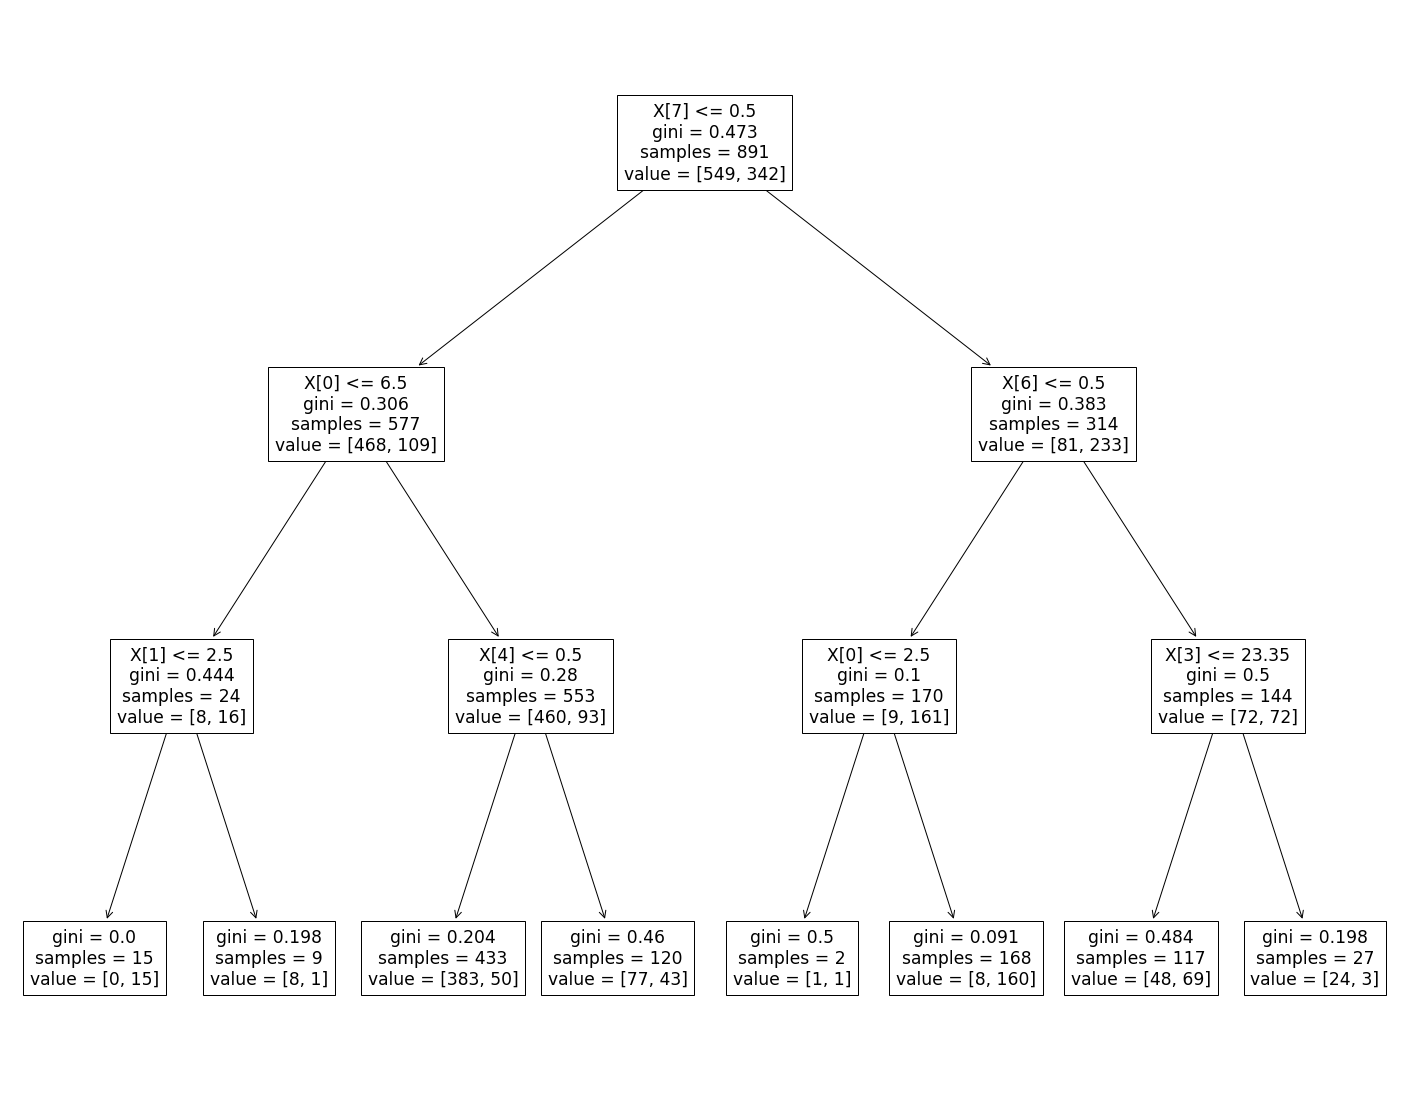

In [38]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(tree_clf)

[Text(2790.0, 3805.2000000000003, 'Female <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]\nclass = 0'),
 Text(1395.0, 2718.0, 'Age <= 6.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]\nclass = 0'),
 Text(697.5, 1630.8000000000002, 'SibSp <= 2.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]\nclass = 1'),
 Text(348.75, 543.5999999999999, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]\nclass = 1'),
 Text(1046.25, 543.5999999999999, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = 0'),
 Text(2092.5, 1630.8000000000002, 'First Class <= 0.5\ngini = 0.28\nsamples = 553\nvalue = [460, 93]\nclass = 0'),
 Text(1743.75, 543.5999999999999, 'gini = 0.204\nsamples = 433\nvalue = [383, 50]\nclass = 0'),
 Text(2441.25, 543.5999999999999, 'gini = 0.46\nsamples = 120\nvalue = [77, 43]\nclass = 0'),
 Text(4185.0, 2718.0, 'Third Class <= 0.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]\nclass = 1'),
 Text(3487.5, 1630.8000000000002, 'Age <= 2.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]\ncla

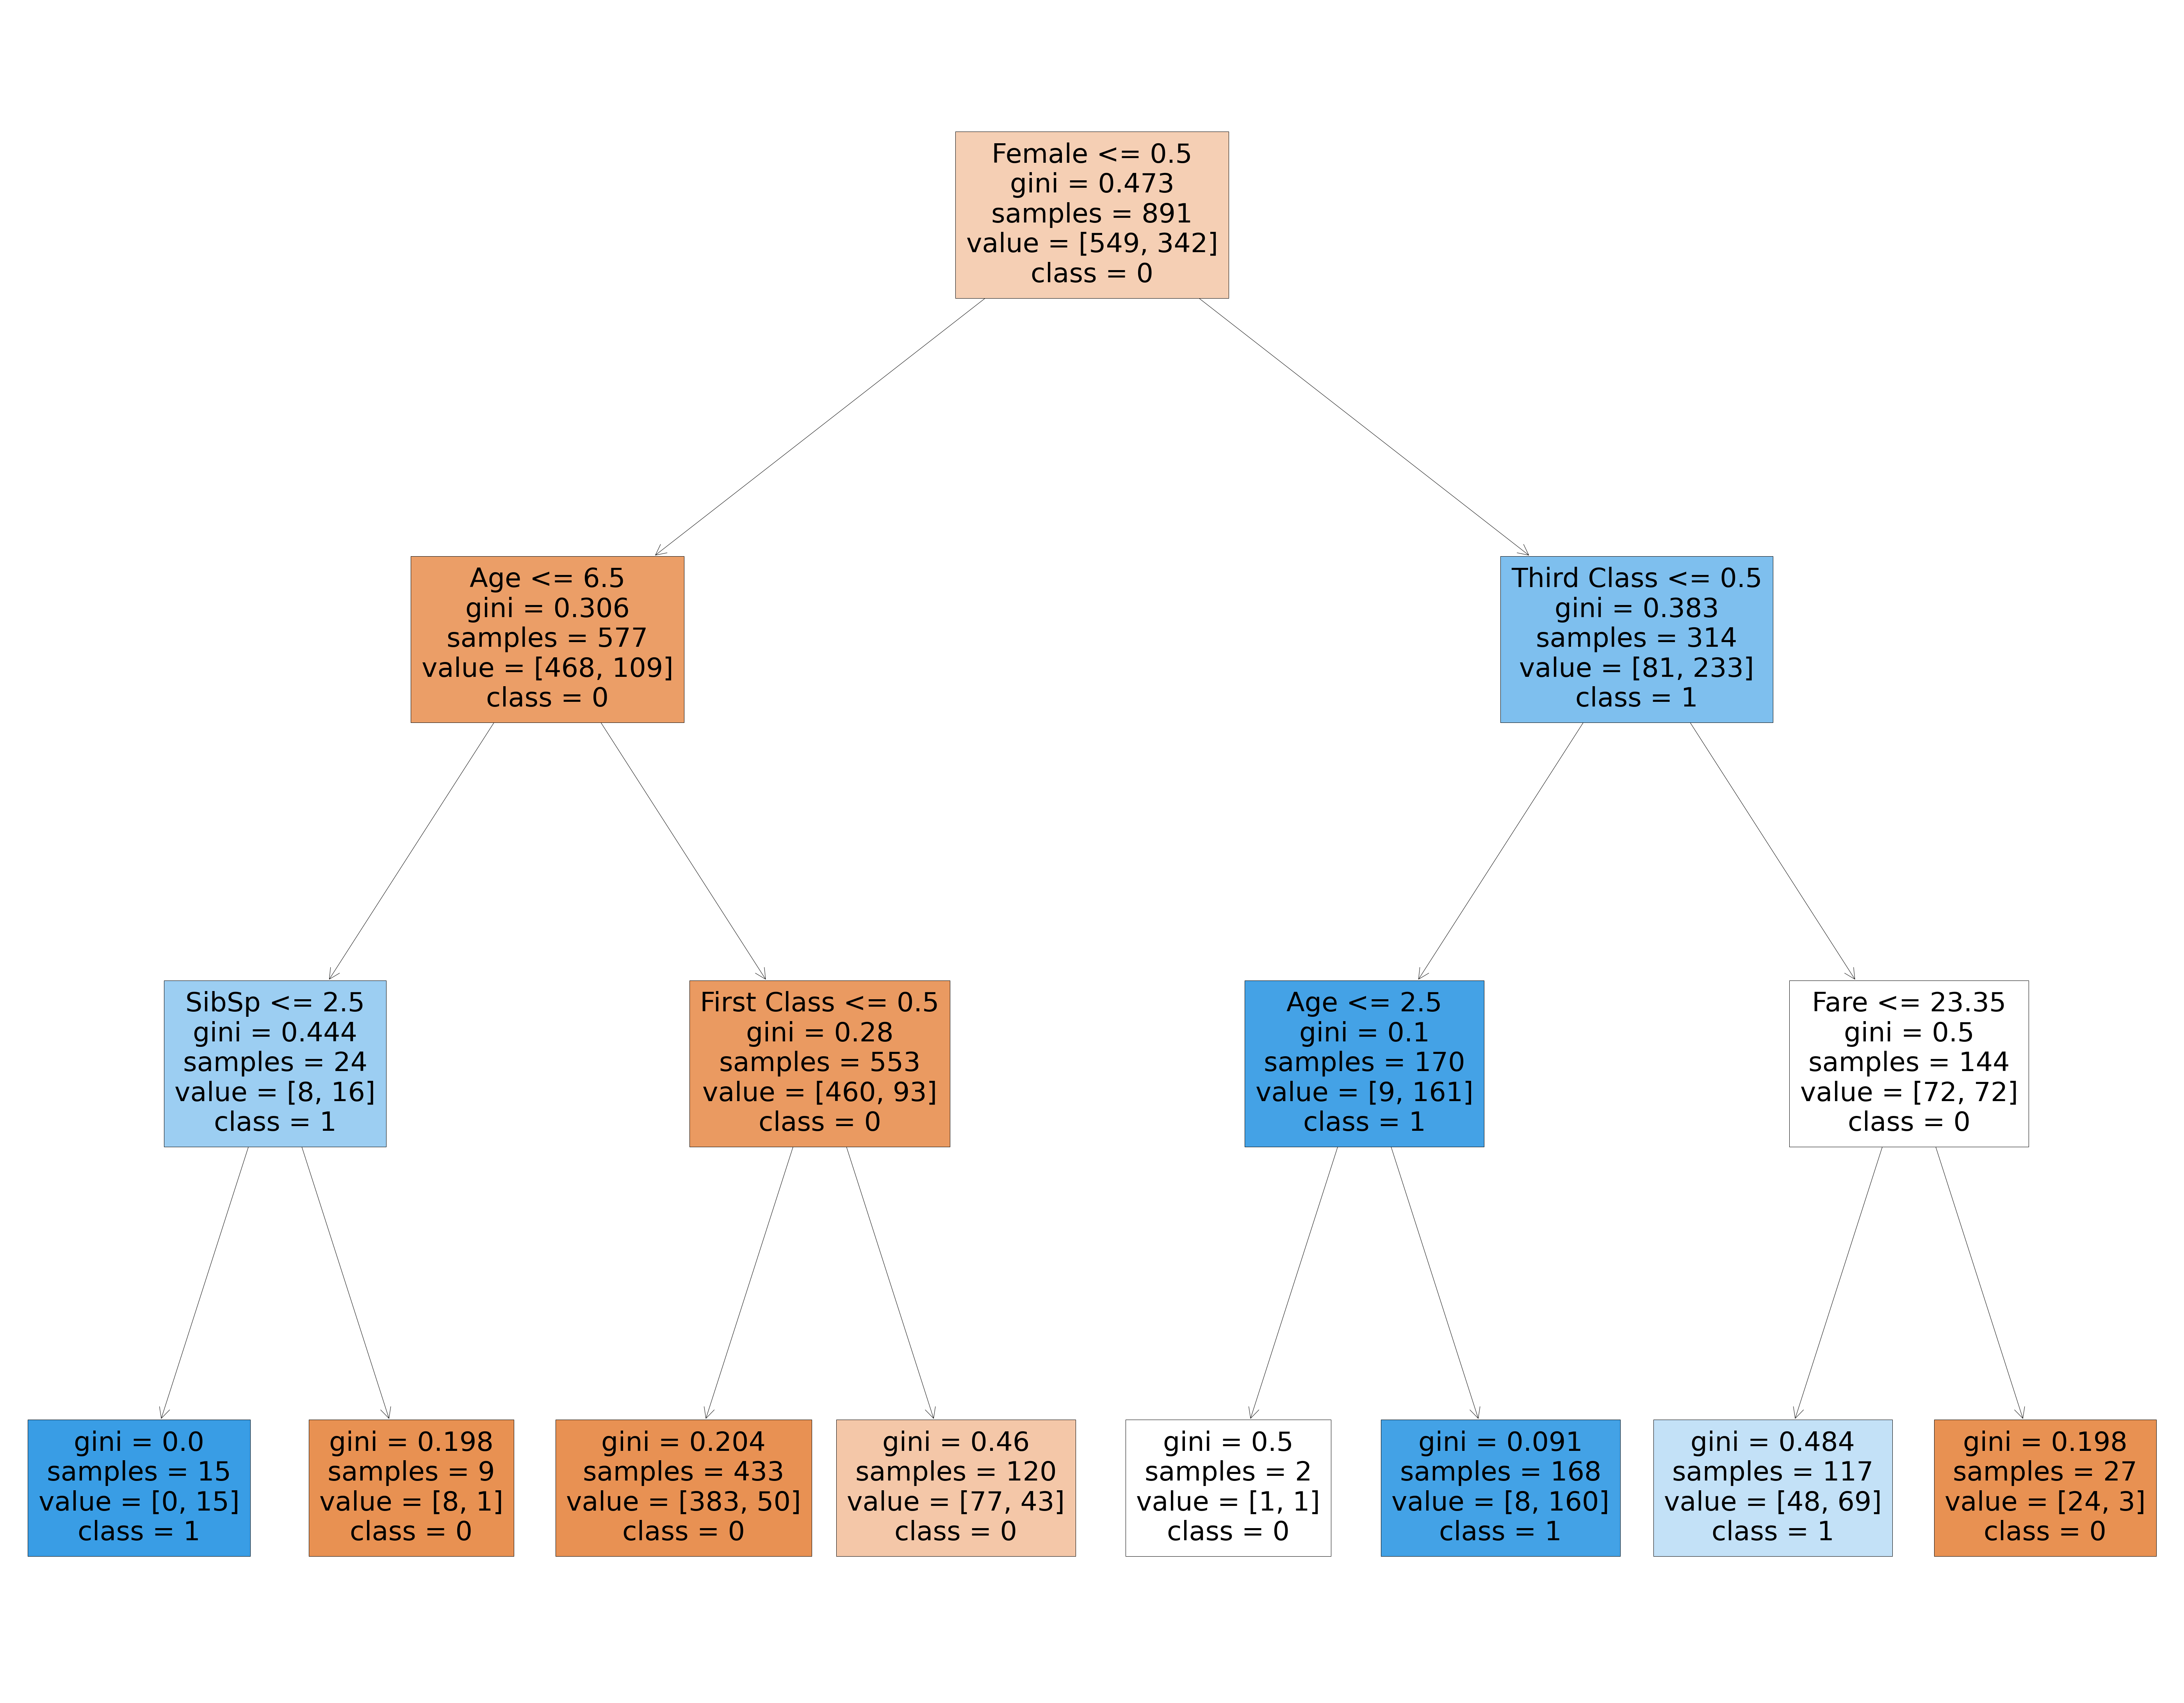

In [39]:
fig = plt.figure(figsize=(100,80))
tree.plot_tree(tree_clf,
               feature_names =['Age', 'SibSp', 'Parch','Fare','First Class','Second Class','Third Class', 'Female','Male', 'C','Q','S'], 
               class_names=['0','1'],
               filled = True)

In [40]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(tree_clf, X_train, y_train, cv=10)
cv_scores.mean()

0.8148189762796504